# EE 379K Lab 10

## Rohan Nagar and Wenyang Fu

1. Let $\{w_t\} \sim N(0,1)$ be a white noise process. Consider the autoregressive process (this is a generative model):

$y_t = -a_1y_{t-1} - a_2y_{t-2} + w_t$.

a. Let $a_1 = \frac{3}{4}$ and $z_2 = \frac{1}{8}$. Generate and plot trajectories for this time series. Do you think it is WSS?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
%matplotlib inline

In [2]:
def autoregression(mean, var, num_points, coef, init):
    points = []
    ys = init
    for _ in range(num_points):
        next_point = np.dot(coef, ys) + np.random.normal(0, 1)
        points.append(next_point)
        ys.pop()
        ys.insert(0, next_point)
    plt.plot(points)
    return points

In [3]:
a1 = -3/4
a2 = -1/8
y_minus1 = 1
y_minus2 = 0
coef = [a1, a2]
init = [y_minus1, y_minus2]
mean, var = (0, 1)

ar = partial(autoregression, mean, var, 1000, coef, init)

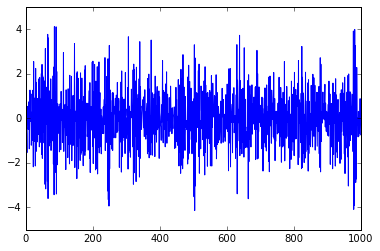

In [4]:
l = ar()

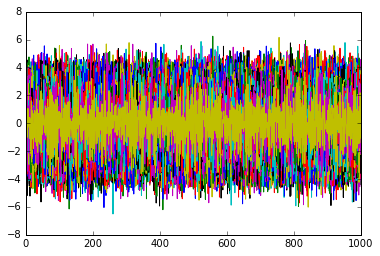

In [5]:
# Plot 1000 trajectories with the same initial conditions
trajectories = [ar() for _ in range(1000)]

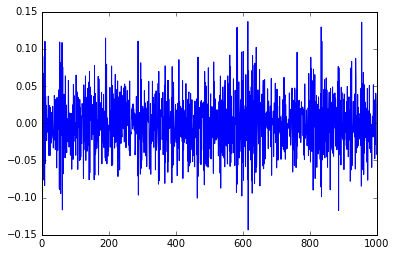

In [6]:
plt.plot(np.array(trajectories).mean(axis=0))

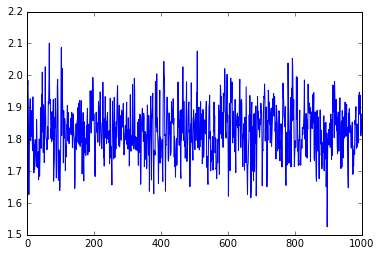

In [7]:
plt.plot(np.array(trajectories).var(axis=0))

In [8]:
a1 = -3/4
a2 = -1/8
y_minus1 = 1
y_minus2 = 1
coef = [a1, a2]
init = [y_minus1, y_minus2]
mean, var = (0, 1)
ar = partial(autoregression, mean, var, 1000, coef, init)

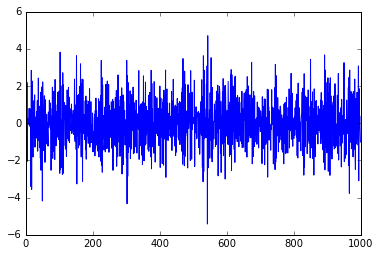

In [9]:
l = ar()

Yes, this process looks like it is WSS, since the signal is consistent noise.

How about $a_1 = -2.25$ and $a_2 = 0.5$? Is this WSS?

In [10]:
a1 = 9/4
a2 = -1/2
y_minus1 = 0.5
y_minus2 = 1
coef = [a1, a2]
init = [y_minus1, y_minus2]
mean, var = (0, 1)

ar2 = partial(autoregression, mean, var, 100, coef, init)

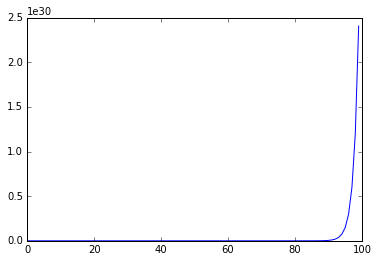

In [11]:
l = ar2()

This process is not WSS, since the signal is diverging, and the mean and varaince are changing over tiem.

This is WSS:

In [12]:
a1 = -0.5
a2 = 0.3
a3 = -0.05
a4 = 0.01
coef = [a1, a2, a3, a4]
init = [0, 0.5, 0.5, 1]
mean, var = (0, 1)

ar = partial(autoregression, mean, var, 1000, coef, init)

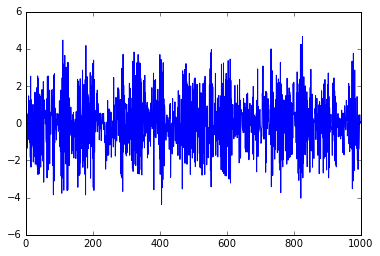

In [13]:
l = ar()

This is not WSS:

In [14]:
a1 = -3/4
a2 = -0.5
a3 = -0.5
a4 = -0.5
coef = [-.75, .5, -.1, .01]
init = [0, 0.5, 0.5, 1]
mean, var = (0, 1)

ar = partial(autoregression, mean, var, 1000, coef, init)

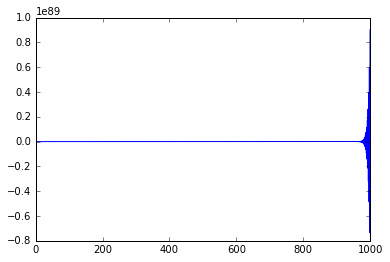

In [15]:
l = ar()

In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 2

The output $y_t$ of the AR process

$$y_t = -a_1 y_{t-1} - a_2 y_{t-2} - a_3 y_{t-3} - a_4 y_{t-4} + w_t$$

is the result of passing the input $w_t$ through a linear time filter.

The $z$ transform of the filter is the transfer function between the input and the output. This is equal to

$$H(z) = \frac{1}{AR(z)} = \frac{1}{1 + a_1 z^{-1} + a_2 z^{-2} + a_3 z^{-3} + a_4 z^{-4}}$$

We can also note that in order for $H(z)$ to be a stable filter, and therefore be Wide Sense Stationary, $AR(z)$ must have all of its roots inside the unit circle.

# Problem 3

In [20]:
airline_data = pd.read_csv('data/AirPassengers.csv', parse_dates=True)
airline_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Plots

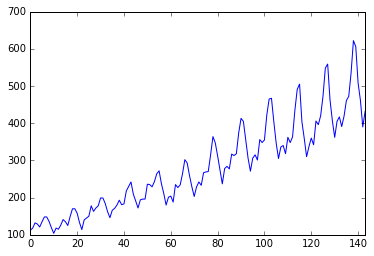

In [21]:
airline_data['#Passengers'].plot()

#### Rolling mean with window 5

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':


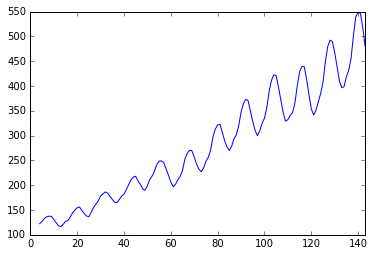

In [22]:
pd.rolling_mean(airline_data['#Passengers'], window=5).plot()

#### Rolling standard deviation with window 5

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  if __name__ == '__main__':


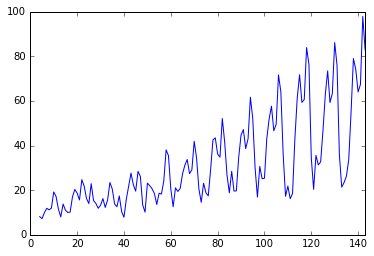

In [23]:
pd.rolling_std(airline_data['#Passengers'], window=5).plot()

## Transforms

Log Transform

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  from ipykernel import kernelapp as app


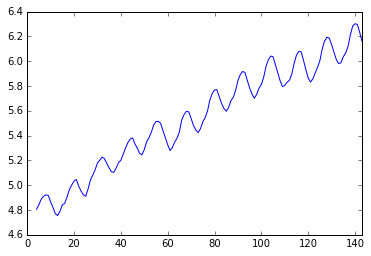

In [24]:
airline_data['#Passengers.log'] = np.log(airline_data['#Passengers'])
pd.rolling_mean(airline_data['#Passengers.log'], window=5).plot()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  if __name__ == '__main__':


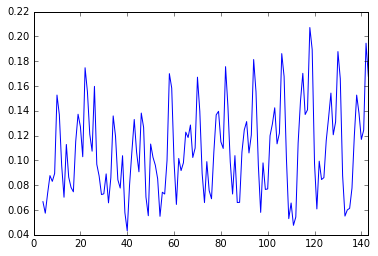

In [26]:
pd.rolling_std(airline_data['#Passengers.log'], window=5).plot()

Sqrt transform

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  from ipykernel import kernelapp as app


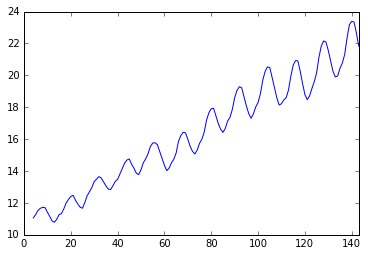

In [25]:
airline_data['#Passengers.sqrt'] = np.sqrt(airline_data['#Passengers'])
pd.rolling_mean(airline_data['#Passengers.sqrt'], window=5).plot()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  if __name__ == '__main__':


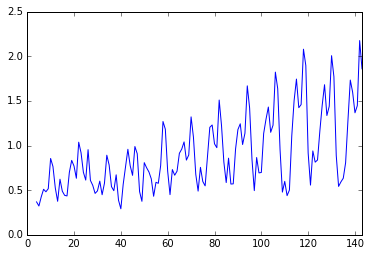

In [27]:
pd.rolling_std(airline_data['#Passengers.sqrt'], window=5).plot()

### Question
Which of these is better?

### Answer
The log transform is better, since the rolling variance of the log transform is more stationary relative to the rolling variance of the sqrt transform.

## Dickey-Fuller Test

In [47]:
from statsmodels.tsa.stattools import adfuller

adfuller(airline_data['#Passengers'])

(0.81536887920605106,
 0.99188024343764103,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 996.69293083901891)

## Remove Mean with Transform of Differences

In [48]:
def difference_transform(series):
    new_series = []
    for i in range(len(series)):
        if i == 0:
            new_series.append(series[i])
        else:
            new_series.append(series[i] - series[i-1])
            
    return new_series

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  from ipykernel import kernelapp as app


(-3.1551124072891503,
 0.022734464303624316,
 12,
 131,
 {'1%': -3.481281802271349,
  '10%': -2.5786771965503177,
  '5%': -2.8838678916645279},
 995.40139015094792)

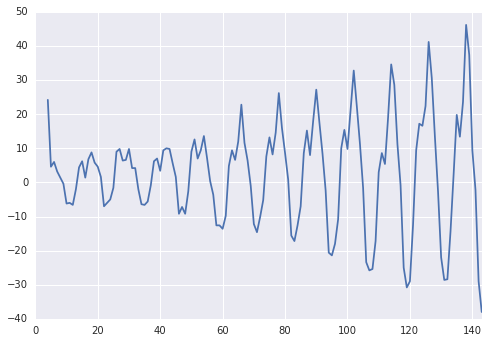

In [49]:
airline_data['#Passengers.diff'] = difference_transform(airline_data['#Passengers'])
pd.rolling_mean(airline_data['#Passengers.diff'], window=5).plot()

adfuller(airline_data['#Passengers.diff'])

## Regress Against Linear Function

In [50]:
from sklearn.linear_model import LinearRegression

# need to do linear regression with time steps (0, 1, 2, ..) as the X and the airline_data['#Passengers'] as the y.
regr = LinearRegression()

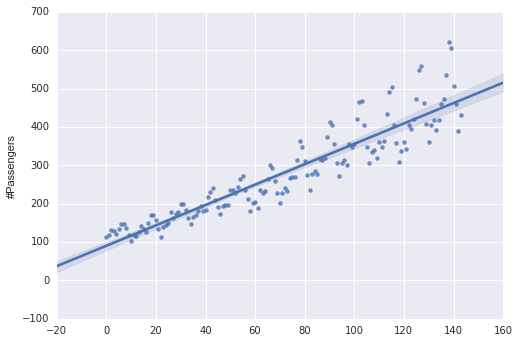

In [51]:
import seaborn as sns

x_timesteps = np.fromiter(range(len(airline_data['Month'])), dtype=np.int32).reshape(-1, 1)

sns.regplot(x_timesteps, '#Passengers', airline_data)

## Remove Mean Using Linear Regression

Compared to using a transformation of differences, removing the mean using linear regression makes a more stationary-looking process.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()


(-2.1019659058880014,
 0.24372483602015449,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 992.62934767868637)

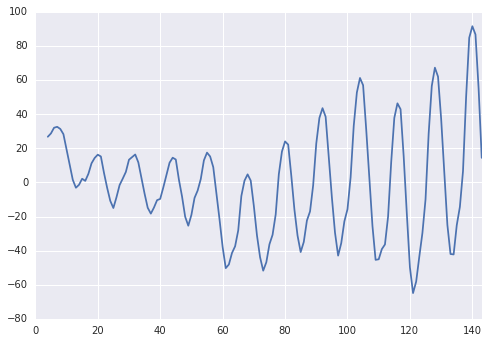

In [106]:
regr.fit(x_timesteps, airline_data['#Passengers'])
mean_preds = regr.predict(x_timesteps)
airline_data['#Passengers.linreg_diff'] = airline_data['#Passengers'] - mean_preds

pd.rolling_mean(airline_data['#Passengers.linreg_diff'], window=5).plot()
adfuller(airline_data['#Passengers.linreg_diff'])

## Remove the Seasonality

Using differences with a periodicity of $d$, we can find the best rolling difference by visually inspecting the mean and the variance, and choosing the variance that stays the most stationary, and corrobrating that information with results from the Dickey-Fuller test. With these results, I choose a value of $d=6$.

In [82]:
def seasonality_transform(series, d):
    new_series = []
    for i in range(len(series)):
        if i == 0:
            new_series.append(series[i])
        else:
            if i - d < 0:
                continue
            new_series.append(series[i] - series[i-d])
            
    return pd.Series(new_series)

In [83]:
from functools import partial

regr = LinearRegression()
regr.fit(x_timesteps, airline_data['#Passengers.log'])
airline_data['#Passengers.log_linreg'] = airline_data['#Passengers.log'] - regr.predict(x_timesteps)
d_diff = partial(seasonality_transform, airline_data['#Passengers.log_linreg'])

In [89]:
seasonal_diff = [d_diff(d) for d in range(1, 10)]  # Data adjusted with log transform, linear regression, and seasonal diff

(-2.7225552823572619,
 0.070215882112045408,
 14,
 129,
 {'1%': -3.4820879640460261,
  '10%': -2.5788643813472749,
  '5%': -2.8842185101614626},
 -444.97455856001989)

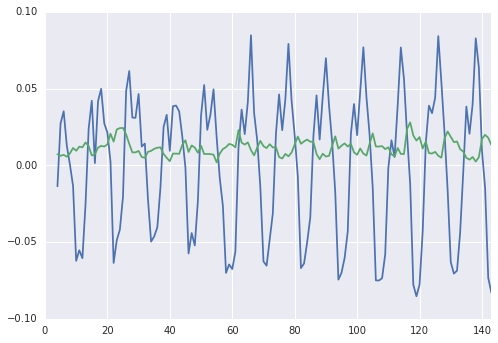

In [107]:
seasonal_diff[0].rolling(window=5).mean().plot()
seasonal_diff[0].rolling(window=5).var().plot()
adfuller(seasonal_diff[0])

(-3.526127151697696,
 0.0073409062272697615,
 11,
 131,
 {'1%': -3.481281802271349,
  '10%': -2.5786771965503177,
  '5%': -2.8838678916645279},
 -435.09320491172309)

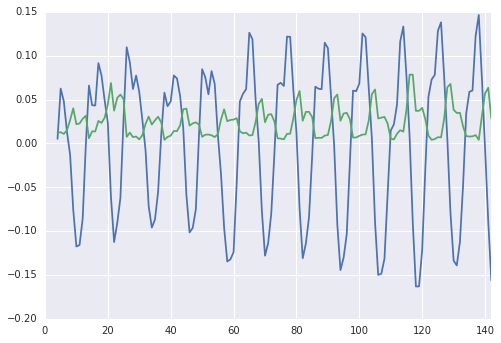

In [108]:
seasonal_diff[1].rolling(window=5).mean().plot()
seasonal_diff[1].rolling(window=5).var().plot()
adfuller(seasonal_diff[1])

(-2.7003390446143305,
 0.073979617887759988,
 14,
 125,
 {'1%': -3.4837793736959997, '10%': -2.5792569759999999, '5%': -2.88495387648},
 -384.57258005248548)

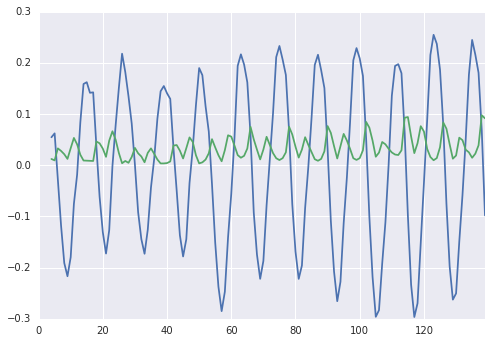

In [112]:
seasonal_diff[4].rolling(window=5).mean().plot()
seasonal_diff[4].rolling(window=5).var().plot()
adfuller(seasonal_diff[4])

(-3.8239341764567563,
 0.0026717136582459656,
 7,
 131,
 {'1%': -3.481281802271349,
  '10%': -2.5786771965503177,
  '5%': -2.8838678916645279},
 -426.33892741247496)

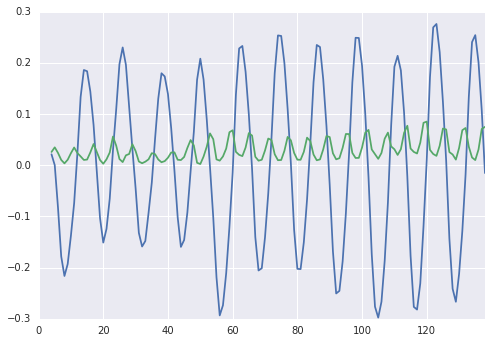

In [110]:
seasonal_diff[5].rolling(window=5).mean().plot()
seasonal_diff[5].rolling(window=5).var().plot()
adfuller(seasonal_diff[5])

# Problem 4

### Quebec Data

In [3]:
quebec_data = pd.read_csv('data/QuebecCarsales.csv')
quebec_data.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


### Dow Jones Data

In [4]:
dow_data = pd.read_csv('data/DowJones.csv')
dow_data.head()

,Week,"Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974"
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43
